# Anemia - K Nearest Neighbours

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [4]:
# Anemia data

anemia_df = ml.get_data_of_disease(driver, 'Anemia')
anemia_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Anemia
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
8878,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8879,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8880,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [5]:
knn_classifier = ml.KNeighborsClassifier()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

knn_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = knn_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, knn_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9627023223082336
Testing Accuracy:  0.9636824324324325


## Feature Selection

### Correlation Analysis

In [6]:
knn_classifier_test = ml.KNeighborsClassifier()

In [8]:
pos_corr, neg_corr = ml.get_correlated_features(anemia_df,'Anemia',pos=0.0,neg=-0.0)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features[:30]

['Gender',
 'Red cell distribution width [%]',
 'Transferrin receptor [nmol/L]',
 'Platelet_Lymphocyte Ratio',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Triglyceride [mmol/L]',
 'Triglyceride_HDL Ratio',
 'Gamma Glutamyl Transferase [IU/L]',
 'Potassium [mmol/L]',
 'Hydroxycotinine [ng/mL]',
 'Vitamin C [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Cis-beta-carotene [umol/L]',
 'Cotinine [ng/mL]',
 'Retinyl stearate [umol/L]']

In [9]:
ml.evaluate_feature_set(corr_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.963

Precision: 0.667

Recall: 0.059

F1-Score: 0.108


### SelectFromModel

In [10]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Gender',
 'Age',
 'A/G Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Blood mercury [nmol/L]',
 'Globulin [g/dL]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Hydroxycotinine [ng/mL]',
 'Iron frozen [umol/L]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Albumin [g/dL]',
 'Hemoglobin [g/dL]',
 'Transferrin Saturation [%]',
 'Transferrin receptor [nmol/L]']

In [11]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.964

Precision: 0.846

Recall: 0.081

F1-Score: 0.148


### SelectKBest

In [12]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin receptor [nmol/L]',
 'RBC count [million cells/uL]',
 'Albumin [g/dL]',
 'Gender',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Mean cell hemoglobin [pg]',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Age',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Total Calcium [mg/dL]',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Bilirubin [mg/dL]',
 'Globulin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Mean cell volume [fL]',
 'Segmented neutrophils [%]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Lymphocyte [%]']

In [13]:
ml.evaluate_feature_set(k_best_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.963

Precision: 0.625

Recall: 0.074

F1-Score: 0.132


### Recursive Feature Elimination (RFE) 

In [14]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Platelet count [1000 cells/uL]',
 'Iron frozen [umol/L]',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Hematocrit [%]',
 'Glycohemoglobin [%]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Non_HDL Ratio',
 'Total Cholestrol_HDL Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Albumin [g/dL]',
 'Age',
 'Blood mercury [nmol/L]',
 'Transferrin Saturation [%]',
 'Trans-lycopene [umol/L]',
 'Hemoglobin [g/dL]',
 'A/G Ratio',
 'Creatine Phosphokinase [IU/L]',
 'White blood cell count [1000 cells/uL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Alanine Aminotransferase [U/L]',
 'Total Lycopene [umol/L]',
 'Alpha-crypotoxanthin [umol/L]']

In [15]:
ml.evaluate_feature_set(rfe_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.964

Precision: 0.846

Recall: 0.081

F1-Score: 0.148


### Lasso Regularization

In [16]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Gender',
 'Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Age',
 'Alpha-crypotoxanthin [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Blood mercury [nmol/L]',
 'Retinol [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Hydroxycotinine [ng/mL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'RBC count [million cells/uL]',
 'Total Calcium [mg/dL]',
 'Alanine Aminotransferase [U/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Glycohemoglobin [%]',
 'Total Cholestrol_HDL Ratio',
 'Uric Acid [mg/dL]',
 'Trans-lycopene [umol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Sodium [mmol/L]',
 'Blood cadmium [nmol/L]',
 'Transferrin Saturation [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Fasting Glucose [mmol/L]',
 'Iron frozen [umol/L]',
 'Blood Urea Nitrogen [mg/dL]']

In [17]:
ml.evaluate_feature_set(l1_selected_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.964

Precision: 0.765

Recall: 0.096

F1-Score: 0.170


### Relief F

In [18]:
relieff_features = ml.relief_feature_select(30,X,y)

In [19]:
relieff_features[:30]

['Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Segmented neutrophils [%]',
 'Lymphocyte [%]',
 'BMI',
 'Neutrophil_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Red cell distribution width [%]',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Gender',
 'Albumin [g/dL]',
 'Uric Acid [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Osmolality [mmol/Kg]',
 'Iron frozen [umol/L]',
 'Retinol [umol/L]',
 'Total Calcium [mg/dL]',
 'Chloride [mmol/L]',
 'Non_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'UIBC [umol/L]',
 'Globulin [g/dL]',
 'Blood selenium [umol/L]',
 'Bicarbonate [mmol/L]']

In [20]:
ml.evaluate_feature_set(relieff_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.965

Precision: 0.857

Recall: 0.088

F1-Score: 0.160


### Optimal no. of features

In [21]:
final_features = list(l1_selected_features) 

Finding optimal no. of features..: 100%|████████| 85/85 [00:36<00:00,  2.34it/s]


Maximum accuracy = 0.9619 for 15 features


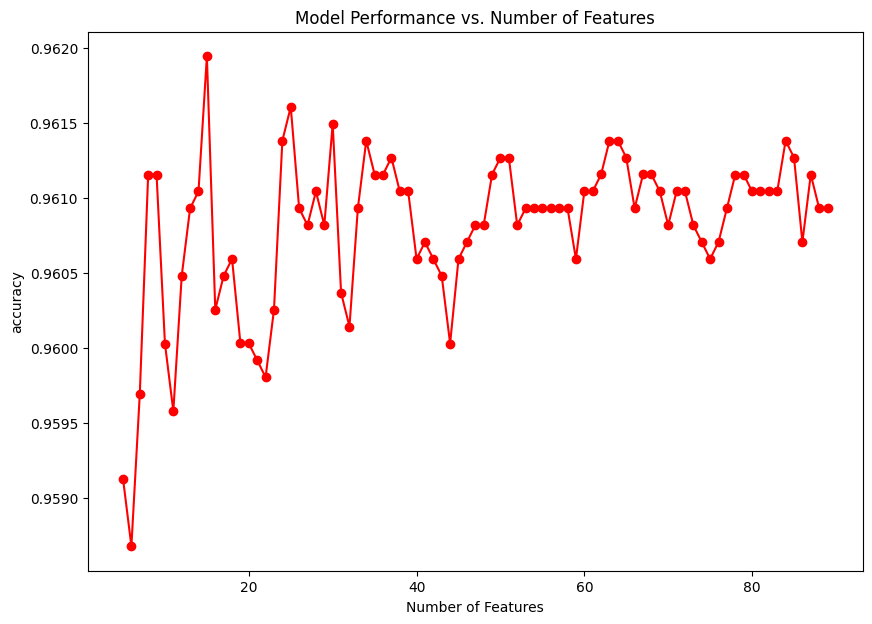

In [22]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [00:37<00:00,  2.29it/s]


Maximum f1 = 0.1626 for 15 features


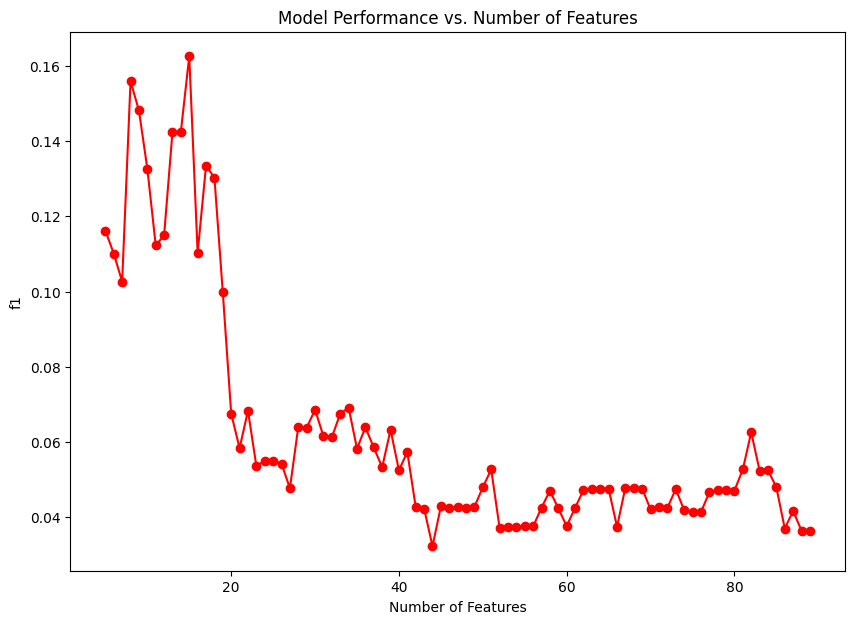

In [23]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 85/85 [00:37<00:00,  2.29it/s]


Maximum recall = 0.0972 for 15 features


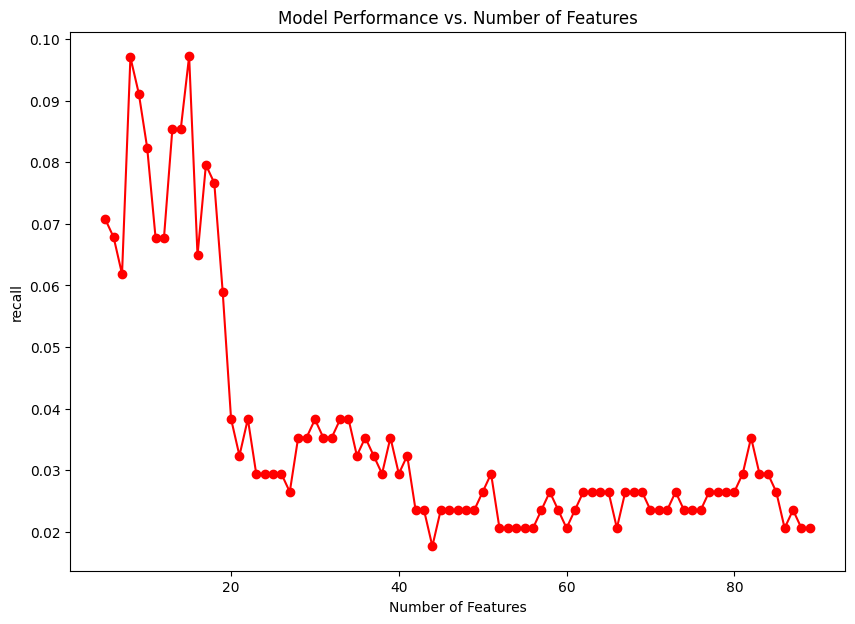

In [24]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='recall')

In [25]:
num_features = 15

selected = final_features[:num_features]
selected.append('Anemia')

anemia_df = anemia_df[selected]

In [26]:
# Save feature set
    
with open('../Models/Anemia/Feature Sets/KNN Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [27]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [28]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.965

Precision: 0.812

Recall: 0.096

F1-Score: 0.171


### Mode Imputation

In [29]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [30]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.965

Precision: 0.760

Recall: 0.140

F1-Score: 0.236


### k-NN Imputation

In [31]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [32]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.965

Test Accuracy: 0.965

Precision: 0.724

Recall: 0.154

F1-Score: 0.255


### Multiple Imputation by Chained Equations (MICE)

In [33]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [34]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.965

Test Accuracy: 0.965

Precision: 0.704

Recall: 0.140

F1-Score: 0.233


### Median Imputation

In [35]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [36]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.965

Precision: 0.741

Recall: 0.147

F1-Score: 0.245


### Mean Imputation

In [37]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [38]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.965

Test Accuracy: 0.966

Precision: 0.769

Recall: 0.147

F1-Score: 0.247


### Dropping Null Values

In [39]:
# Drop null values
anemia_df_na = anemia_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df_na, label = 'Anemia',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [40]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.963

Test Accuracy: 0.968

Precision: 0.806

Recall: 0.294

F1-Score: 0.431


## Oversampling and Undersampling

### Random Oversampling

In [41]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

knn_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(knn_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.966

Test Accuracy: 0.937

Precision: 0.395

Recall: 1.000

F1-Score: 0.567


### SMOTE (Synthetic Minority Over-sampling Technique)

In [42]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

knn_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(knn_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.930

Test Accuracy: 0.870

Precision: 0.241

Recall: 1.000

F1-Score: 0.389


### Random Undersampling

In [43]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

knn_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(knn_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.813

Test Accuracy: 0.689

Precision: 0.099

Recall: 0.800

F1-Score: 0.176


### Tomek Links

In [44]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

knn_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(knn_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.967

Precision: 0.743

Recall: 0.306

F1-Score: 0.433


### SMOTE + Tomek Links

In [45]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

knn_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(knn_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.930

Test Accuracy: 0.870

Precision: 0.241

Recall: 1.000

F1-Score: 0.389


In [46]:
# Model seems to perform with ROS

X_train, y_train = X_ros, y_ros

## Hyperparameter Optimization 

### Grid Search

In [47]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [48]:
grid_best_params, knn_classifier_grid = ml.grid_search_optimize(knn_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [49]:
grid_best_params

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

### Random Search

In [50]:
rand_best_params, knn_classifier_rand = ml.random_search_optimize(knn_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [51]:
rand_best_params

{'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'algorithm': 'auto'}

### Optuna

In [52]:
def objective(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 2)
    
    model = ml.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [53]:
best_trial , knn_classifier_opt = ml.optuna_optimize(objective, ml.KNeighborsClassifier, n_trials=150)

In [54]:
best_trial

{'n_neighbors': 9, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 2}

## Evaluation on Test Set


Train Accuracy: 0.634

Test Accuracy: 0.961

Precision: 0.793

Recall: 0.237

F1-Score: 0.365

Confusion Matrix:

[[1949    6]
 [  74   23]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98      1955
     Class 1       0.79      0.24      0.37        97

    accuracy                           0.96      2052
   macro avg       0.88      0.62      0.67      2052
weighted avg       0.96      0.96      0.95      2052


ROC-AUC Curve:


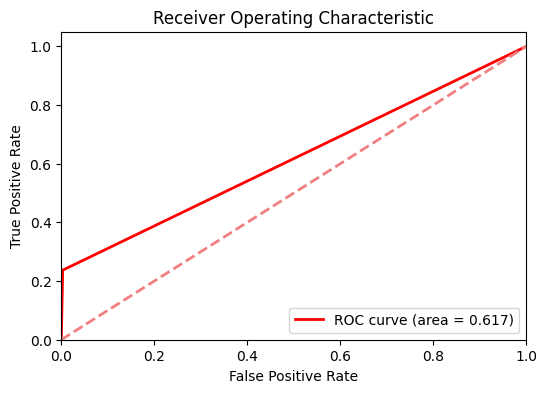

In [63]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(knn_classifier_rand, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [55]:
ml.k_cross_validate(knn_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95711501 0.95516569 0.95321637 0.95321637 0.95711501 0.94152047
 0.95906433 0.95906433 0.95126706 0.94921875]

Mean accuracy score:  0.9535963389376219

Standard deviation:  0.005076682043374992


In [56]:
ml.k_cross_validate(knn_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96296296 0.94736842 0.94736842 0.95321637 0.9454191  0.92982456
 0.9454191  0.94931774 0.94736842 0.95117188]

Mean accuracy score:  0.9479436982212477

Standard deviation:  0.007795714516738328


In [57]:
ml.k_cross_validate(knn_classifier_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95906433 0.95906433 0.94736842 0.94931774 0.95321637 0.94152047
 0.95321637 0.95516569 0.95321637 0.94921875]

Mean accuracy score:  0.9520368847465888

Standard deviation:  0.005103509972963454


In [58]:
ml.k_cross_validate(knn_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95906433 0.95516569 0.95126706 0.95516569 0.95516569 0.94736842
 0.95321637 0.95321637 0.95516569 0.95507812]

Mean accuracy score:  0.9539873446637428

Standard deviation:  0.0029140774554632072


### Stratified K-fold

In [59]:
ml.stratified_k_cross_validate(knn_classifier,X,y,n_splits=10)


Average Accuracy: 0.9530123050682262

Average Precision: 0.45500000000000007

Average Recall: 0.09202898550724639

Average F1-Score: 0.15030103995621238


In [60]:
ml.stratified_k_cross_validate(knn_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.9485273513645224

Average Precision: 0.34568542568542565

Average Recall: 0.11684782608695654

Average F1-Score: 0.1704390908879556


In [61]:
ml.stratified_k_cross_validate(knn_classifier_rand,X,y,n_splits=10)


Average Accuracy: 0.9510614644249513

Average Precision: 0.434047619047619

Average Recall: 0.1545289855072464

Average F1-Score: 0.224408381869157


In [62]:
ml.stratified_k_cross_validate(knn_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.9535963389376219

Average Precision: 0.45

Average Recall: 0.05

Average F1-Score: 0.08974358974358973


### Save Model

In [76]:
final_knn_estimator = knn_classifier_rand

In [65]:
# Saving the model

ml.save_model(final_knn_estimator, "../Models/Anemia/KNN.pkl")

Saved Model


## Prediction

In [66]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_knn_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [ 0.         -0.70497137  0.41552876  0.19883489 -0.9318181  -1.14255287
  1.62043267 -0.40991323 -0.45404441 -0.17608512  0.60364297 -0.41522229
 -0.34532157 -0.08629362 -0.60946383]

Expected Class:  0

 Modified Instance:
 [ 0.         -0.68522717  0.55487237  0.04997592 -0.81581907 -0.81790175
  1.5887115  -0.11852724 -0.47355451 -0.36945954  0.59619668 -0.34432206
 -0.40786196 -0.29638076 -0.69891988]

Predicted Class:  [0]


In [94]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_knn_estimator, X_test.iloc[14], y_test.iloc[14], 0.4)

Instance:
 [ 0.          5.94149655 -4.57889454 -4.01964029  0.21927195 -0.57270003
 -0.01720037  0.39400496 -0.08949304 -1.23976328 10.64898931 -0.50227867
 -0.34519038 -0.26721969 -1.40245243]

Expected Class:  1

 Modified Instance:
 [ 0.00000000e+00  6.09914729e+00 -4.76751875e+00 -4.08552146e+00
  3.35384224e-01 -6.67319285e-01 -5.25795444e-02  4.66712221e-01
  7.33270183e-03 -1.56017207e+00  1.04860230e+01 -5.36163782e-01
 -4.46682909e-01 -3.74115633e-01 -1.52568677e+00]

Predicted Class:  [0]


In [88]:
ml.predict_on_modified_instance(final_knn_estimator, X_test.iloc[165], y_test.iloc[165], 0.3)

Instance:
 [ 0.          2.01403824 -1.85466365 -1.67071661  0.02742361 -1.07923589
 -0.48193407  0.97380431  0.05905763 -0.79986926  1.77415215  1.48155173
 -0.34532157 -0.73745838 -0.86718512]

Expected Class:  1

 Modified Instance:
 [ 0.          2.3706843  -1.91418776 -1.99600283 -0.03270891 -0.86744305
 -0.35563629  0.80563122 -0.09220487 -0.7089214   1.79510697  1.30898211
 -0.31822985 -0.8505156  -0.85841725]

Predicted Class:  [1]
